In [1]:

%run GT5RandGridenv.ipynb
%run GT5vis.ipynb

In [2]:
# Initialize the environment
#env = RandGridWorldEnv(size=10)

# Reset the environment and check the initial observation
#observation_info = env.reset()
#observation = observation_info[0]
#start = observation['agent'] 
#print("Initial observation:", observation)

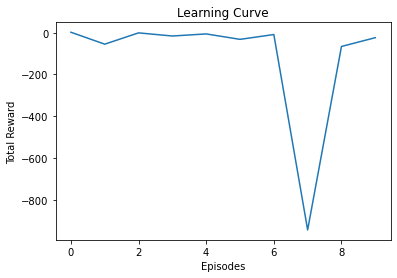

In [3]:
import numpy as np
import gymnasium as gym

# Assuming the RandGridWorldEnv class is defined in the notebook
# from RandGridWorldEnv import RandGridWorldEnv

# Initialize the environment
env = RandGridWorldEnv(size=10)
# Reset the environment and check the initial observation
observation_info = env.reset()
observation = observation_info[0]
start1 = observation['agent'] 
# Number of states and actions
num_states = env.size ** 2
num_actions = env.action_space.n

# Initialize the Q-table
Q = np.zeros((num_states, num_actions))

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration rate
min_epsilon = 0.01
epsilon_decay_rate = 0.995
total_episodes = 10#1000

# Initialize a list to store the path of the agent in the final episode
final_episode_path = []

# Function to convert a grid position to a state index
def position_to_state(position, size):
    return position[0] * size + position[1]

# Function to calculate Manhattan distance
def manhattan_distance(pos1, pos2):
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

# Initialize a list to store the total reward per episode
total_rewards_per_episode = []

# Training loop
for episode in range(total_episodes):
    # Reset the environment and get the initial observation
    observation, _ = env.reset()  # Unpack the tuple
    agent_position = observation['agent']
    target_position = observation['target']

    state = position_to_state(agent_position, env.size)
    previous_distance = manhattan_distance(agent_position, target_position)
    cumulative_reward = 0

    
  
    
    # Record the path for the final episode
    if episode == total_episodes - 1:
        final_episode_path.append(agent_position)

    done = False
    while not done:
        # Epsilon-greedy action selection
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q[state])  # Exploit

        # Take action and get next observation
        next_observation, reward, done, _, info = env.step(action)  # Unpack all returned values

        next_agent_position = next_observation['agent']
        next_state = position_to_state(next_agent_position, env.size)

        # Calculate the reward based on distance to target
        current_distance = manhattan_distance(next_agent_position, target_position)
        distance_reward = 1 if current_distance < previous_distance else -1

        # Optionally combine distance_reward with the environment's reward
        total_reward = distance_reward + reward
        
         # Accumulate rewards
        cumulative_reward += total_reward  # <-- Add this line to update cumulative_reward
        
         # Record the path for the final episode
        if episode == total_episodes - 1:
            final_episode_path.append(next_agent_position)
 
        # Update Q-table
        Q[state, action] = Q[state, action] + alpha * (total_reward + gamma * np.max(Q[next_state]) - Q[state, action])

        state = next_state
        previous_distance = current_distance
    

    # Reduce exploration rate
    epsilon = max(min_epsilon, epsilon * epsilon_decay_rate)
    total_rewards_per_episode.append(cumulative_reward)

    
    
# After the training loop, plot the learning curve
plt.plot(total_rewards_per_episode)
plt.title('Learning Curve')
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.show()

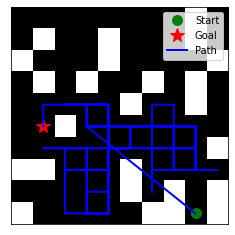

In [4]:
#start = (env._agent_location[0], env._agent_location[1])  # Swap if necessary
goal = (env._target_location[0], env._target_location[1])  # Swap if necessary

# Call the visualization function
visualize5(env._grid, final_episode_path, start1, goal)
#visualize5(env._grid, final_episode_path, env._agent_location, env._target_location)
#env.close()  # Close the environment when done